In [84]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [85]:
# Exploring classification metrics in the presence of imbalanced data
N=100
#class_prior 
cp = 0.05
X_imb, Y_imb = make_classification(n_samples=N,n_features=2, n_redundant=0, n_informative=2,
                                   n_clusters_per_class=1,weights=[cp,1-cp])
#plt.scatter(X_imb[:, 0], X_imb[:, 1], marker='o', c=Y_imb,
#            s=25, edgecolor='k')

import collections
class_counts = collections.Counter(Y_imb)
print class_counts


Counter({1: 95, 0: 5})


In [89]:
# let's try a dummy classifer that always predicts the positive class
y_pred = [1] * N
from sklearn.metrics import accuracy_score
# Not bad ! :-)
print "Accuracy=",accuracy_score(Y_imb, y_pred)


Accuracy= 0.95


Text(0,0.5,u'Precision')

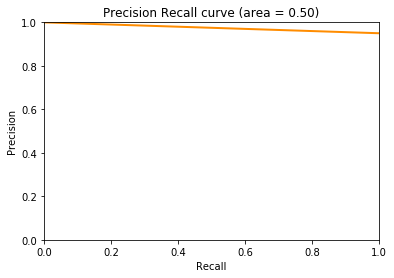

In [87]:
# precision recall
from sklearn.metrics import precision_recall_curve
prec_const_clf_imb, rec_const_clf_imb, _ = precision_recall_curve(Y_imb, dummy_clf)
plt.plot(rec_const_clf_imb,prec_const_clf_imb,color='darkorange',lw=2)
plt.title(('Precision Recall curve (area = %0.2f)' % auc_const_clf_imb))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')

Text(0,0.5,u'True Positive Rate')

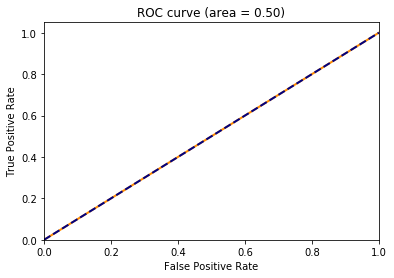

In [88]:
from sklearn.metrics import roc_curve, auc
fpr_const_clf_imb, tpr_const_clf_imb,_ = roc_curve(Y_imb, dummy_clf)
auc_const_clf_imb = auc(fpr_const_clf_imb, tpr_const_clf_imb)
plt.plot(fpr_const_clf_imb, tpr_const_clf_imb, color='darkorange',lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title(('ROC curve (area = %0.2f)' % auc_const_clf_imb))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')